# Project: Investigate TMBD Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, we will be investigation the TMBD Movies Dataset. This data set contains information about movies collected from The Movie Database (TMDb), including popularity, budget, revenue, and many more. We will be performing analysis on that information, and see if any patterns emerge.

Questions we want answers for are:
1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?

In [13]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

Before we go on to answer our questions, we have to make sure the dataset is as tidy as possible, to make sure our presentation of the data will be accurate. We will be checking for null values, any illogical values, duplicated rows and correct any data type that needs correcting. Alse we will drop any column that doesn't have useful data.

### General Properties

In [14]:
# read movies dataset
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
# drop irrelevant columns
# I'm dropping production_companies as well, because it has many null values,
# and it's not very beneficial to include it in our analysis.
df.drop(columns=['id','imdb_id','homepage','tagline','overview','keywords', 'release_date', 'production_companies'], inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
df.shape

(10866, 13)

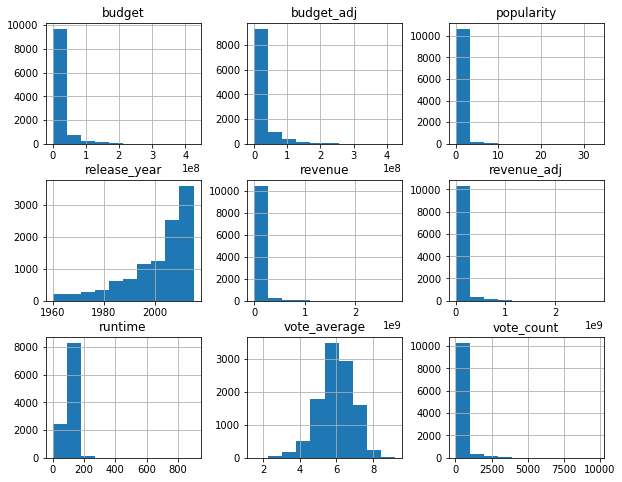

In [17]:
#an early overview of the data
df.hist(figsize=(10,8));

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


Our dataset seems to have many missing values. Since our missing values have to do only with (genre,cast,director), we'll just fill it with a known value so as to not lose data. And the data types seems to be set correctly to their corresponding columns.

In [19]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We see from these statistics that the minimum value is zero for these columns(budget, revenue, runtime, budget_adj, revenue_adj). So before answering our question involving revenue, we'll have to drop budget and revenue rows with zero values. Also, we see that maximum runtime is 900, which means there are TV shows as well as movies in our dataset, for convenience we are going to include them in our analysis.

In [20]:
# check for duplicated rows
sum(df.duplicated())

1

The dataset have one duplicated row we're going to drop.

### Data Cleaning
After reviewing our dataset, we've concluded that there are null values in the dataset that need to be filled, and a duplicated row that will also be removed. The minimum value for budget and revenue is zero. we resolve this by removing rows with zero values.

In [23]:
# drop the duplicate
df.drop_duplicates(inplace=True)
df[df.revenue == 0].count()

popularity        6016
budget            6016
revenue           6016
original_title    6016
cast              5945
director          5973
runtime           6016
genres            5993
vote_count        6016
vote_average      6016
release_year      6016
budget_adj        6016
revenue_adj       6016
dtype: int64

Because there are thousands of row with zero values we're going to assign the non-zeroes dataframe to a new one, so we can make use of the data, and answer our first question!

In [24]:
# replace null values in rows with the string "TBD"
df.fillna('TBD', inplace=True)
# drop rows with zero values
revenue_df = df[(df != 0).all(1)]

We have finished cleaning our dataset. Now, we will just review general properties after the cleaning.

In [25]:
df.shape

(10865, 13)

In [26]:
revenue_df.shape

(3854, 13)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10865 non-null object
director          10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


In [28]:
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
popularity        3854 non-null float64
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
cast              3854 non-null object
director          3854 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 421.5+ KB


Everything seems to be in good shape. Now, we move on to exploring the Data!

<a id='eda'></a>
## Exploratory Data Analysis

Now that we've cleaned our dataset, we are ready to move on to answering our previous questions:
1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?

### Which genres are most popular from year to year?
To answer this question we have do analysis for each genre, meaning that for each genre we will group the data by year and find highest mean for popularity, for each year.

In [29]:
# First we have to identify all genres in the dataset
# because genres column contain multiple genres seperated by "|" for the same row

genres_list = df.genres.tolist()

#index
ind = 0
for genre in genres_list:
    genres_list[ind] = str(genre).split('|')
    ind += 1
    
# genres_list now have a list of lists, now we take elemnts on nested list and make it an element for outer list
flat_list = []
for sublist in genres_list:
    for item in sublist:
        flat_list.append(item)

# now we turn the list into a set to drop all duplicates
set_genres = set(flat_list)

In [30]:
# year_dict is a dictionary that have years as keys and a list of mean popularity for each genre
year_dict = {}
# genres_dict is a dictionary that have years as keys and a list of lists containing mean popularity and its genre
genres_dict = {}
for i in set_genres:
    # genres_pop holds a pandas series of years as indices and mean popularity
    genres_pop = df.query('genres == @i').groupby(['release_year'])['popularity'].mean()
    for ind, value in genres_pop.items():
        if ind in year_dict:
            year_dict[ind].append(value)
        else:
            year_dict[ind] = [value]
            
    for ind, value in genres_pop.items():
        if ind in genres_dict:
            genres_dict[ind].append([i, value])
        else:
            genres_dict[ind] = [[i, value]]

print(genres_dict)

{1999: [['Foreign', 0.015074], ['Drama', 1.249393764705882], ['Comedy', 0.4394375555555555], ['Fantasy', 0.758412], ['Documentary', 0.1418835]], 1968: [['War', 0.166845], ['Horror', 0.6900814999999999], ['Western', 0.621202], ['Science Fiction', 0.867192], ['Drama', 0.165021], ['Animation', 0.1040335], ['Comedy', 0.35474900000000004]], 1989: [['War', 1.836091], ['Horror', 0.20048166666666667], ['Drama', 0.5982754285714285], ['Music', 0.260602], ['Comedy', 0.38870958333333333], ['Documentary', 0.163885], ['TBD', 0.094652]], 2001: [['War', 1.839325], ['Horror', 0.45533500000000005], ['Thriller', 0.45438666666666666], ['Science Fiction', 0.198443], ['Drama', 0.37758450000000005], ['Animation', 0.993311], ['Comedy', 0.6931367999999993], ['Documentary', 0.20253924999999975], ['Action', 0.20867], ['TBD', 0.130018]], 2010: [['War', 0.507092], ['Horror', 0.2990823333333333], ['Thriller', 0.3546215], ['Adventure', 0.4055313333333333], ['Science Fiction', 0.4366055], ['Drama', 0.4625792432432432

In [31]:
# create a dictionary for most popular genre in each year
popular_genre_by_year = {}
for key, value in year_dict.items():
    # max pop in year_dict
    popular_genre_by_year[key] =  max(value)
    
for key, value in genres_dict.items():
    for i in value:
        # checking which genre is most pop for each year
        if popular_genre_by_year[key] == i[1]:
            popular_genre_by_year[key] = i[0]
            
print(popular_genre_by_year)

{1999: 'Drama', 1968: 'Science Fiction', 1989: 'War', 2001: 'War', 2010: 'Action', 2013: 'War', 1998: 'Science Fiction', 1960: 'Thriller', 1961: 'Drama', 1963: 'Comedy', 1964: 'Comedy', 1965: 'Horror', 1966: 'Drama', 1969: 'Drama', 1970: 'Western', 1971: 'Comedy', 1972: 'Western', 1973: 'Western', 1974: 'Comedy', 1976: 'Drama', 1977: 'Documentary', 1978: 'Music', 1980: 'Drama', 1981: 'Adventure', 1982: 'Fantasy', 1983: 'Horror', 1984: 'Animation', 1985: 'Animation', 1986: 'Animation', 1987: 'Science Fiction', 1988: 'Action', 1990: 'Adventure', 1991: 'Horror', 1992: 'Western', 1993: 'Comedy', 1994: 'Comedy', 1995: 'Science Fiction', 1996: 'Fantasy', 1997: 'Comedy', 2000: 'Horror', 2002: 'Animation', 2003: 'Music', 2004: 'Comedy', 2005: 'Thriller', 2006: 'Comedy', 2007: 'Western', 2008: 'Action', 2009: 'Action', 2011: 'Comedy', 2012: 'Adventure', 2014: 'Adventure', 2015: 'Action', 1967: 'Thriller', 1962: 'Western', 1975: 'Drama', 1979: 'Comedy'}


This is a dictionary that contains most popular genre in each year in dataset

{1962: 'Western', 1968: 'Western', 1992: 'Comedy', 2003: 'Music', 2007: 'Western', 1985: 'Horror', 1986: 'Animation', 2002: 'Animation', 2011: 'Thriller', 2014: 'Comedy', 1981: 'Horror', 1982: 'Horror', 1996: 'Fantasy', 1999: 'Drama', 1976: 'Drama', 1997: 'Drama', 1998: 'Science Fiction', 2000: 'Horror', 2001: 'War', 2005: 'Action', 2006: 'Comedy', 2008: 'Action', 2009: 'Comedy', 2012: 'Adventure', 2013: 'Horror', 2015: 'Action', 1961: 'Drama', 1963: 'Horror', 1977: 'Horror', 1978: 'Music', 1980: 'Drama', 1983: 'Horror', 1984: 'Drama', 1987: 'Science Fiction', 1988: 'Action', 1990: 'Drama', 1991: 'Horror', 2004: 'Drama', 2010: 'Action', 1995: 'Science Fiction', 1966: 'Drama', 1969: 'Drama', 1971: 'Drama', 1975: 'Drama', 1979: 'Comedy', 1989: 'War', 1993: 'Comedy', 1994: 'Comedy', 1972: 'Comedy'}

### What kinds of properties are associated with movies that have high revenues?
To answer this question, we're going to use the non-zeroes dataframe we made in the data cleaning process. Then we see what kind of properties popular movies have, for example, does it have high vote_count, or high popularity?

In [33]:
revenue_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


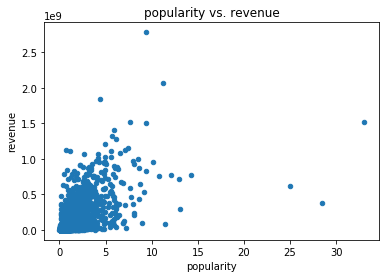

In [37]:
revenue_df.plot(kind='scatter', x='popularity', y='revenue')
plt.title('popularity vs. revenue')
plt.show()

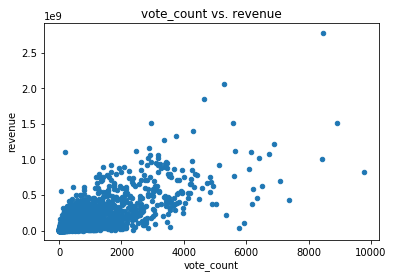

In [38]:
revenue_df.plot(kind='scatter', x='vote_count', y='revenue')
plt.title('vote_count vs. revenue')
plt.show()

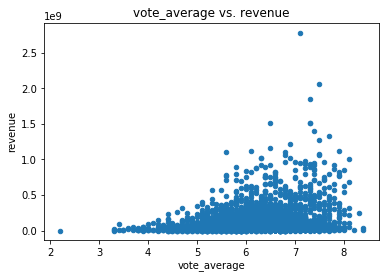

In [39]:
revenue_df.plot(kind='scatter', x='vote_average', y='revenue')
plt.title('vote_average vs. revenue')
plt.show()

1. From the popularity plot, we see that only a few instances exist where higher popularity means higher revenue.
2. From the vote count plot, we see that there is a positive correlation between vote_count and revenue.
3. From the vote avg plot, we see that there is a positive correlation between vote_average and revenue.

<a id='conclusions'></a>
## Conclusions

At the start of our process we first cleaned our data; we dropped irrelevant columns to our questions, we dealt with null values by replacing it with a string we know, and we dropped a duplicate row. After cleaning our data we started analyzing the data to answer our posed questions.\n


The first question we had to group the data by genre somehow but we couldn't use the DataFrame.groupby method, because there were multiple genres for a lot of movies. So we had to use DataFrame.query method to create a dataframe for each genre. After that we grouped the data by release_year and saw the mean popularity for each year, and all that is done for each genre. In the end we gathered the mean values and got the maximum value for each year between all genres.

The second question we did data visualization and used scatter plots to convey the relationship between revenue and other properties in the dataset.

Among the limitations we encountered was:
1. The thousands of missing data from revenue; the analysis would be more accurate if it was filled out.
2. There was a number of missing data from the genres column that we filled out with a known string, because it was a small percentage of the dataset, it didn't have much effect on our analysis.
3. The popularity column can feel ambiguous, since there are alot of factors that compute to it; if it was seperated into more than one column with a clearer meaning, we could have had more precise analysis.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])